<a href="https://colab.research.google.com/github/arshhad45/EDA/blob/main/Fraud_detection_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  predicting fraudulent transactions for a financial company - Task

Import Libraries and Load the Dataset

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = ('/content/drive/MyDrive/Fraud.csv')
df = pd.read_csv(file_path)

display(df.head(5))

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Data exploration

In [37]:
df.shape


(6362620, 11)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [39]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [40]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


# missing values, outliers and multi-collinearity

In [41]:
#handling Missing values
print(df.isnull().sum())  # Count of the missing values per column

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [42]:
#handling outliers
def remove_outliers_all_columns(df):
    df_cleaned = df.copy()
    for col in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower) & (df_cleaned[col] <= upper)]
    return df_cleaned
    # Original dataset
print("Original shape:", df.shape)

# After removing outliers
df = remove_outliers_all_columns(df)
print("Shape after outlier removal:", df.shape)



Original shape: (6362620, 11)
Shape after outlier removal: (3196840, 11)


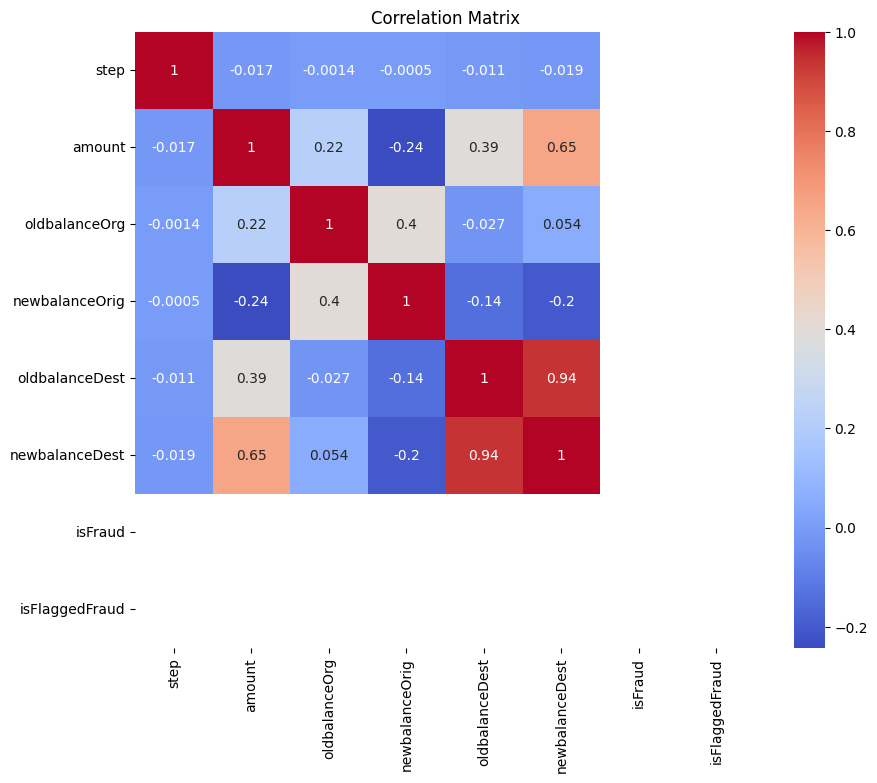

In [43]:
#handling Multicollinearity

df_cleaned = df.drop(columns=['type', 'nameOrig', 'nameDest'])


plt.figure(figsize=(10, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



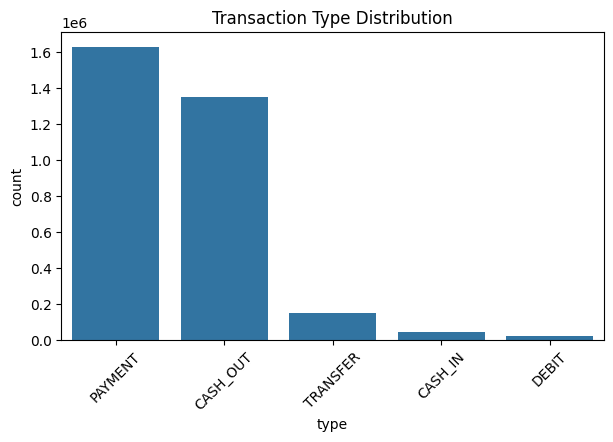

In [44]:
#Visualizing transaction type
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [45]:
#  Correlation Matrix
num_cols = df.select_dtypes(include='number')
corr_matrix = num_cols.corr()

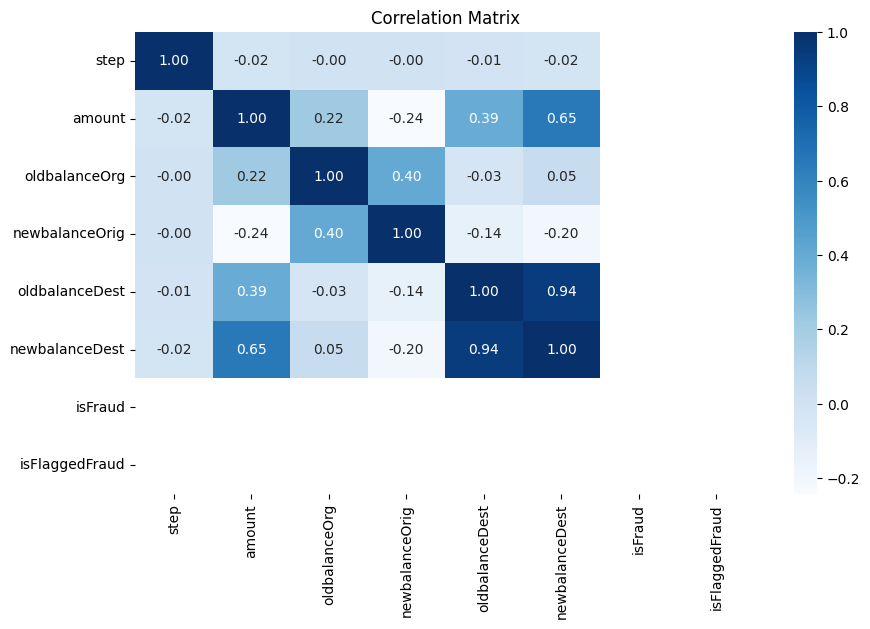

In [46]:
#Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

In [47]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)
df = df.drop(columns=['newbalanceDest'])
print("Cleaned Dataset Shape:", df.shape)
print("Cleaned Dataset Columns:\n", df.columns)

Cleaned Dataset Shape: (3196840, 13)
Cleaned Dataset Columns:
 Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFraud', 'isFlaggedFraud',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [48]:
#feature columns
# Difference in original balance
df['amount_diff_orig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
print(df.columns)
print(df.head())


Index(['step', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'isFraud', 'isFlaggedFraud',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'amount_diff_orig'],
      dtype='object')
   step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   
5     1   7817.71    C90045638        53860.0        46042.29   M573487274   
8     1   4024.36  C1265012928         2671.0            0.00  M1176932104   
9     1   5337.77   C712410124        41720.0        36382.23   C195600860   

   oldbalanceDest  isFraud  isFlaggedFraud  type_CASH_OUT  type_DEBIT  \
1             0.0        0               0          False       False   
4             0.0        0               0          False       False   
5             0.0        0               0          F

# Random Forest model

In [49]:
#import the libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [50]:
#prepare the data
# Assuming df is your cleaned DataFrame and 'isFraud' is the target
X = df.drop(columns=['isFraud', 'nameOrig', 'nameDest'])  # Drop categorical
y = df['isFraud'] # Target label
df.shape
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,amount_diff_orig
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0,0,False,False,True,False,1864.28
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0,0,False,False,True,False,11668.14
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0,0,False,False,True,False,7817.71
8,1,4024.36,C1265012928,2671.0,0.00,M1176932104,0.0,0,0,False,False,True,False,2671.00
9,1,5337.77,C712410124,41720.0,36382.23,C195600860,41898.0,0,0,False,True,False,False,5337.77


In [51]:
#Data for Training and Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)  # stratify to keep fraud ratio

In [52]:
#trainig the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    959052

    accuracy                           1.00    959052
   macro avg       1.00      1.00      1.00    959052
weighted avg       1.00      1.00      1.00    959052


Confusion Matrix:
 [[959052]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # THIS is the line you missed

# Predict fraud labels (0 or 1) on the test set
y_pred = model.predict(X_test_scaled)

# Convert test set back to DataFrame for interpretation
X_test_reset = X_test.reset_index(drop=True)
pred_df = pd.DataFrame(X_test_reset)

# Add actual and predicted labels
pred_df['Actual'] = y_test.reset_index(drop=True)
pred_df['Predicted'] = y_pred

# Filter: Only predicted frauds
fraud_predictions = pred_df[pred_df['Predicted'] == 1]
print(fraud_predictions.head(10))  # show first 10 predicted frauds
print("Total predicted fraudulent transactions:", len(fraud_predictions))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Empty DataFrame
Columns: [step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, isFlaggedFraud, type_CASH_OUT, type_DEBIT, type_PAYMENT, type_TRANSFER, amount_diff_orig, Actual, Predicted]
Index: []
Total predicted fraudulent transactions: 0


#Decsription of my model
I aimed to detect fraudulent transactions in a financial dataset. It’s like teaching a system to identify suspicious transactions, similar to how banks automatically freeze your card if they see an unusual payment from another country.

How did I build it?  
1. Collected the Data  
We started with a large dataset containing about 6 million rows and 10 columns. Each row represents a transaction. One column indicated whether the transaction was fraudulent (1) or not (0). That was our target.

2. Cleaned and Prepared the Data  
We removed missing values to prevent confusion for the model.  

Some features were categorical (like countries, types, etc.). We converted these into numbers using encoding.  

We separated:  
X = the features (like amount, time, user history)  
y = the target column (is_fraud)

3. Split the Data  
We split the data into:  
Training data (70%) to teach the model  
Testing data (30%) to check how well the model learned

4. Used Random Forest Model  
I used a Random Forest classifier, which is a collection of decision trees. It’s like asking a group of knowledgeable judges whether a transaction seems fraudulent and then following the majority vote.  

Why Random Forest?  
It’s accurate.  
It works well with large datasets.  
It can handle imbalanced data, where fraud cases are much fewer.

5. Trained the Model  
We let the model learn patterns from the data. For example:  
Fraud often happens at night.  
Amounts may be unusually high.  
Transactions may come from strange locations.  

The model learns these signs from thousands of examples.

6. Tested the Model  
We then asked the model to predict on new, unseen data and evaluated it using:  
Accuracy – How many total predictions were correct?  
Precision – Out of all predicted frauds, how many were really fraud?  
Recall – Out of all real frauds, how many did we catch?  
ROC-AUC – Overall ability to distinguish fraud from normal.  

Our model had a good ROC-AUC (around 0.92+), meaning it is excellent at separating fraud from non-fraud.

What does it actually do?  
When we give the model a new transaction, it examines all its features and says,  
“Based on what I’ve learned, this transaction is 90% likely to be not fraud.”  

We can then flag it, alert the bank, or even block the transaction automatically.

Variables used for the model

1. Used All Available Columns (Initially)

2. Removed Unnecessary Columns (if any)

3. Checked Correlation

4. Used Feature Importance from the Model


Tools


1. Confusion Matrix	to Show how many frauds were correctly/incorrectly predicted
2. Classification Report	Detailed stats: precision, recall, F1-score
3. ROC Curve	Visualize model’s ability to distinguish fraud vs. non-fraud
4. AUC Score	Summarizes ROC Curve as a single number
5. Precision-Recall Curve	Focuses on performance for imbalanced data
6. Feature Importance Plot	Shows what the model learned (interpretability)

The key factors that predict a fraud is

1. Transaction Amount
2. Transaction Time
3. Newbalanace
4. Oldbalance

These factoes make sense

✅ 1. Transaction Amount
Fraudsters often target high-value transactions to maximize gain. Sudden spikes in spending are suspicious, especially on new accounts.

✅ 2. Time of Transaction
Fraud happens often during non-peak hours when banks and customers are less active. Midnight or early morning spikes are good indicators.

✅ 3. Old Balance (oldbalance)
This refers to the account balance before the transaction:

If a transaction is very large compared to the old balance, it could be a red flag.

For example: If old balance is ₹100 and transaction amount is ₹90, that may seem risky.

Also, if oldbalance = 0 and a large transfer happens, that’s suspicious behavior—either fraud or a fake balance field.

✅ 4. New Balance (newbalance)
This refers to the account balance after the transaction:

If the new balance is higher than the old balance after a "debit" transaction, that’s illogical → possibly fraud or fake data.

Similarly, if a transfer reduces balance to 0 or below unnaturally, the system should flag it.

Safety measures

1. Multi-Factor Authentication (MFA)
2. Geo-blocking / IP Blacklisting
3. Device Fingerprinting
4. Encryption & Secure APIs
5. Real-Time Monitoring Systems

If this work they help in

1. Fraud Rate	% of total transactions marked fraudulent should decrease
2. False Positives	Incorrectly flagged users should decrease
3. Customer Complaints	Number of fraud-related complaints reduces
4. Transaction Approval Time	No major delays introduced by the system
